In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal
plt.style.use('science')
plt.style.use('notebook')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use('science')
# plt.style.use('nature')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [93]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
star = "ASAS-RCB-21"
observed_file = f"{observed_path}/{star}.txt"
observed_data = np.loadtxt(observed_file, unpack=True)
obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

In [97]:
wavecorr = obs_wave*1e-4
fluxcorr = obs_flux
fs = 100000
fc = 25000  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')
fluxcorr = signal.filtfilt(b, a, fluxcorr)

In [41]:
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN_new"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"
# lists['atoms'] = basepath + "atoms_5500K"
lists['atoms'] = basepath + "atoms_5500K_newCI"

In [249]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5000
logg = 1.0
met = 0.0
vmic = 7
lmin = np.min(obs_wave).round(2)
lmax = 2.5e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess = 7.736
oguess = 7.85
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.86-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : -.92, "Mg" : -1.37, "S" : -0.61, "Si": -1.11, "Na":-1.18, "Ca":-1.11} 
rat = 6.85
vmac = 6
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [252]:
turbospectrum_paths['line_list_path'] = "../input_files/linelists/linelist_5000K/"
wavelength, syntflux_all = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wavelength1, syntflux_CO16 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


In [253]:
len(syntflux_all), len(syntflux_CO16)

(103416, 103416)

In [81]:
colors = {
    'blue':    '#1F77B4', 
    'orange':  '#FF7F0E',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#9467BD',
    'gray':    '#7F7F7F',
    'red':     '#D62728',
    'yellow':  '#dede00',
    'pink': '#E377C2',
    'olive': "BCBD22"

} 

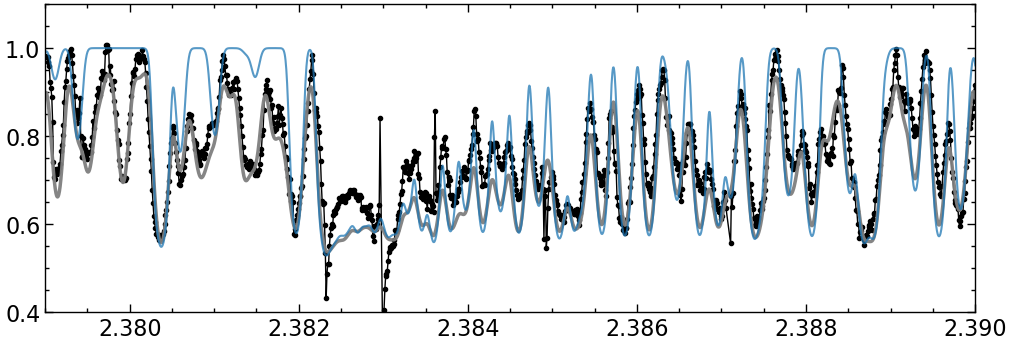

In [95]:
import matplotlib.pyplot as plt

# Plotting the main figure
# plt.figure(figsize=(8.5, 2.5))
lmin, lmax = 2.379e4, 2.39e4
plt.figure(figsize=(12, 4))
plt.xlim(lmin * 1e-4, lmax * 1e-4)
plt.ylim(0.4, 1.1)

# Main plot lines
plt.plot(wavecorr, fluxcorr, 'k.-', lw=1., label="Observed")
plt.plot(wavelength*1e-4, syntflux_all, colors['gray'], lw=2.5, alpha=0.95, label="Full")
plt.plot(wavelength1*1e-4, syntflux_CO16, colors['blue'], lw=1.5, alpha=0.75, label="CO(16)")



In [154]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
star = "HD137613"
observed_file = f"{observed_path}/{star}.txt"
observed_data = np.loadtxt(observed_file, unpack=True)
obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

wavecorr2 = obs_wave*1e-4
fluxcorr2 = obs_flux
fs = 100000
fc = 25000  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')
fluxcorr2 = signal.filtfilt(b, a, fluxcorr2)

In [247]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5500
logg = 1.0
met = 0.0
vmic = 6.5
lmin = np.min(obs_wave).round(2)
lmax = 2.5e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess =  9.238
oguess = 8.723
rat = 0.52
# element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.52-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : 0.0, "Mg" : -1, "S" : -1, "Si": -1, "Na":-1} 
# nguess = 
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.86-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe":-0.19, "Mg":+0.43, "Na":0.32,"Ca":-0.22,"S":-0.05,"Si":-0.38} 

vmac = 0
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [248]:
turbospectrum_paths['line_list_path'] = "../input_files/linelists/linelist_5500K/"
wavelength2, syntflux_all2 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False, verbose=False)
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wavelength2, syntflux_CO162 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths['line_list_path'] = lists['12C18O'] 
wavelength2, syntflux_CO182 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

Trimming
Trimming done
Running TS


KeyboardInterrupt: 

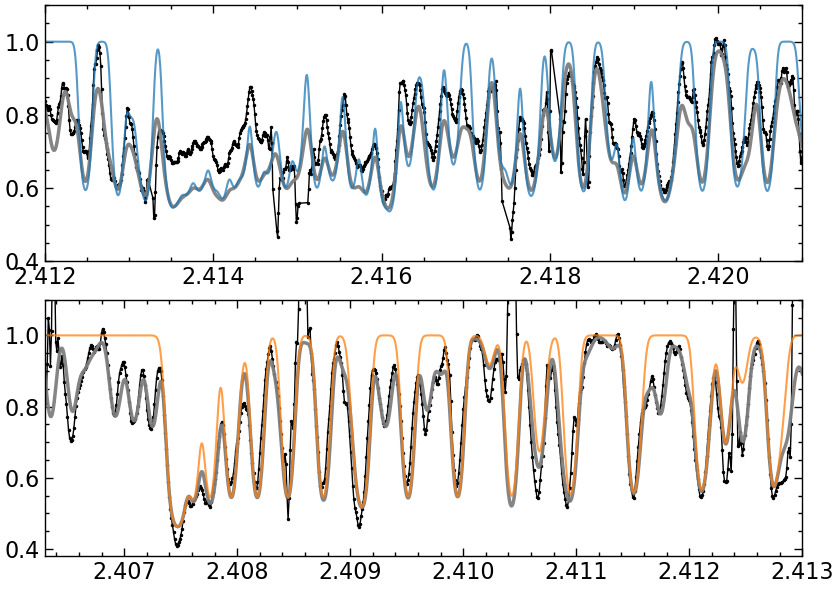

In [246]:
plt.figure(figsize=(8.5, 6))
# stack the two plots

plt.subplot(2, 1, 1)
lmin, lmax = 2.412e4, (2.421)*1e4
plt.xlim(lmin * 1e-4, lmax * 1e-4)
plt.ylim(0.4, 1.1)

# Main plot lines
plt.plot(wavecorr, fluxcorr, 'k.-', lw=1., label="Observed")
plt.plot(wavelength*1e-4, syntflux_all, colors['gray'], lw=2.5, alpha=0.95, label="Full")
plt.plot(wavelength1*1e-4, syntflux_CO16, colors['blue'], lw=1.5, alpha=0.75, label="CO(16)")

plt.subplot(2, 1, 2)
lmin, lmax = 2.4063e4, 2.413e4
plt.xlim(lmin * 1e-4, lmax * 1e-4)
plt.ylim(0.38, 1.1)

# Main plot lines
plt.plot(wavecorr2, fluxcorr2, 'k.-', lw=1., label="Observed")
plt.plot(wavelength2*1e-4, syntflux_all2, colors['gray'], lw=2.5, alpha=0.95, label="Full")
# plt.plot(wavelength2*1e-4, syntflux_CO162, colors['blue'], lw=1, alpha=0.75, label="CO(16)")
plt.plot(wavelength2*1e-4, syntflux_CO182, colors['orange'], lw=1.5, alpha=0.75, label="CO(18)")

plt.tight_layout()



In [245]:
len(wavelength1)

51708

In [165]:
plt.style.use('science')
plt.style.use('nature')

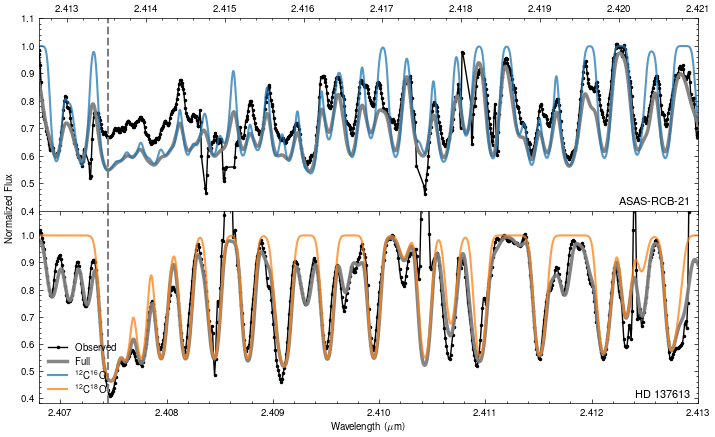

In [221]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8.5, 5))

# First subplot
ax1 = plt.subplot(2, 1, 1)
lmin, lmax = 2.41265e4, 2.421e4
plt.xlim(lmin * 1e-4, lmax * 1e-4)
plt.ylim(0.4, 1.1)

# Main plot lines
line_observed, = plt.plot(wavecorr, fluxcorr, 'k.-', lw=1., label="Observed")
line_full, = plt.plot(wavelength * 1e-4, syntflux_all, colors['gray'], lw=2.5, alpha=0.95)
line_CO16, = plt.plot(wavelength1 * 1e-4, syntflux_CO16, colors['blue'], lw=1.5, alpha=0.75, label=r"$^{12}$C$^{16}$O")

# Move x-axis to the top
ax1.xaxis.set_label_position('top')
ax1.xaxis.tick_top()
ax1.tick_params(axis='x', labeltop=True)

# Add "ASAS-RCB-21" to the bottom-right corner of the top plot
ax1.text(0.99, 0.02, "ASAS-RCB-21", transform=ax1.transAxes, fontsize=8,
         ha='right', va='bottom', color='black')

# Second subplot
ax2 = plt.subplot(2, 1, 2)
lmin, lmax = 2.4068e4, 2.413e4
plt.xlim(lmin * 1e-4, lmax * 1e-4)
plt.ylim(0.38, 1.09)

# Main plot lines
plt.plot(wavecorr2, fluxcorr2, 'k.-', lw=1.)  # Reusing line_observed for legend
plt.plot(wavelength2 * 1e-4, syntflux_all2, colors['gray'], lw=2.5, alpha=0.95)  # Reusing line_full for legend
line_CO18, = plt.plot(wavelength2 * 1e-4, syntflux_CO182, colors['orange'], lw=1.5, alpha=0.75, label=r"$^{12}$C$^{18}$O")
plt.xlabel(r"Wavelength ($\mu$m)")

# Add "HD 137613" to the bottom-left corner of the bottom plot
ax2.text(0.99, 0.02, "HD 137613", transform=ax2.transAxes, fontsize=8,
         ha='right', va='bottom', color='black')
ax2.axvline(2.40745, color=colors['gray'], linestyle='--', lw=1.5)
ax1.axvline(2.413525, color=colors['gray'], linestyle='--', lw=1.5)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.0)

# Add a common legend
plt.legend(handles=[line_observed, line_full, line_CO16, line_CO18],
           labels=["Observed", "Full", r"$^{12}$C$^{16}$O", r"$^{12}$C$^{18}$O"], 
           loc='lower left', fontsize=7)

# Add a common y-axis label
plt.gcf().text(0.09, 0.5, 'Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=7)

# Show the plot
# plt.show()

plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/emission-compare.pdf", dpi = 300)


In [222]:
plt.style.use('science')
plt.style.use('notebook')

In [400]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5000
logg = 1.0
met = 0.0
vmic = 7
lmin = np.min(obs_wave).round(2)
lmax = 2.5e4
# lmax = 22700
ldelta = 0.1
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True

nguess = 7.736
oguess = 8.0
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.86-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : -.92, "Mg" : -1.37, "S" : -0.61, "Si": -1.11, "Na":-1.18, "Ca":-1.11} 
rat = 6.85
vmac = 8
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


turbospectrum_paths['line_list_path'] = "../input_files/linelists/linelist_5000K/"
wavelength, syntflux_all = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wavelength1, syntflux_CO16 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=vmac, rotation=0, do_matplotlib_plot=False)

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


In [318]:
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
oguess = 8.0
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.86-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : -.92, "Mg" : -1.37, "S" : -0.61, "Si": -1.11, "Na":-1.18, "Ca":-1.11} 

vmic = 6
ldelta = 0.1
wavelength2, syntflux_CO16_em = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=8, rotation=0, do_matplotlib_plot=False)

# resample wavelength2 and syntflux_CO16_em to match wavelength1
from scipy.interpolate import interp1d
f = interp1d(wavelength2, syntflux_CO16_em)
syntflux_CO16_em = f(wavelength1)


Trimming
Trimming done
Running TS
TS completed


In [319]:
oguess

8.0

In [320]:
len(syntflux_all)

103416

In [416]:
CO_emission = 1-syntflux_CO16
CO_emission_shifted = np.zeros_like(CO_emission)
shift = 0
if shift > 0:
    if shift < len(CO_emission):
        CO_emission_shifted[shift:] = CO_emission[:-shift]
elif shift < 0:
    if abs(shift) < len(CO_emission):
        CO_emission_shifted[:shift] = CO_emission[-shift:]

f = 0.3
CO_merge = (syntflux_all + f*CO_emission_shifted)/(1+f*CO_emission_shifted)

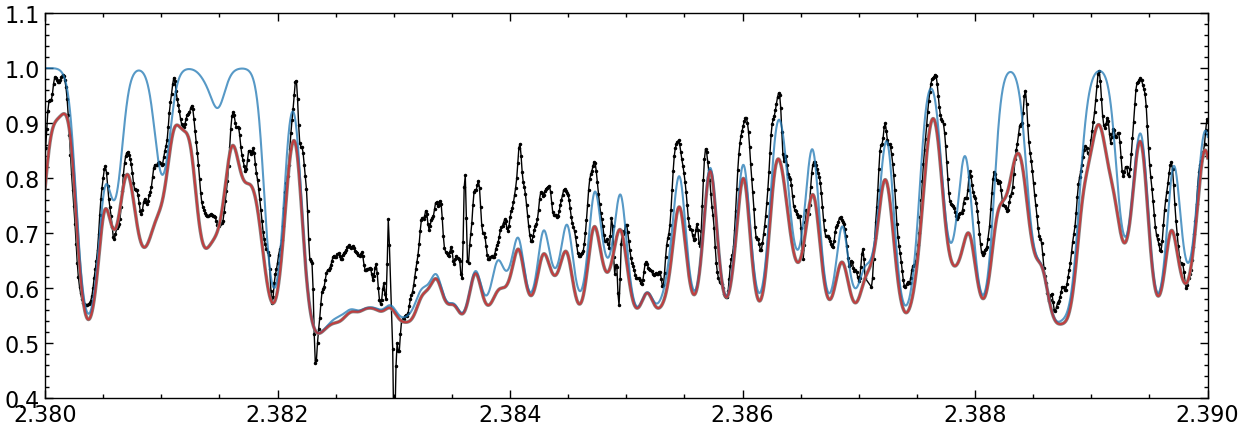

In [417]:
plt.figure(figsize=(15, 5))
# stack the two plots

# plt.subplot(2, 1, 1)
lamin, lamax = 2.38e4, (2.39)*1e4
plt.xlim(lamin * 1e-4, lamax * 1e-4)
plt.ylim(0.4, 1.1)

# Main plot lines
plt.plot(wavecorr, fluxcorr, 'k.-', lw=1., label="Observed")
plt.plot(wavelength*1e-4, syntflux_all, colors['gray'], lw=2.5, alpha=0.95, label="Full")
plt.plot(wavelength1*1e-4, syntflux_CO16, colors['blue'], lw=1.5, alpha=0.75, label="CO(16)")
plt.plot(wavelength1*1e-4, CO_merge, colors['red'], lw=1.5, alpha=0.75, label="CO(16) + Full")

# plt.plot(wavelength*1e-4, CO_emission_shifted+0.1, alpha = 0.5)  


In [418]:
turbospectrum_paths['line_list_path'] = lists['12C16O'] 
oguess = 8.0
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 8.86-8.56, "N" : nguess-7.98, "O" : oguess-8.77, "Fe" : -.92, "Mg" : -1.37, "S" : -0.61, "Si": -1.11, "Na":-1.18, "Ca":-1.11} 

vmic = 2
ldelta = 0.1
wavelength2, syntflux_CO16_em = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=1, rotation=0, do_matplotlib_plot=False)

# resample wavelength2 and syntflux_CO16_em to match wavelength1
from scipy.interpolate import interp1d
f = interp1d(wavelength2, syntflux_CO16_em)
syntflux_CO16_em = f(wavelength1)

Trimming
Trimming done
Running TS
TS completed


In [438]:
CO_emission = 1-syntflux_CO16
CO_emission_shifted = np.zeros_like(CO_emission)
shift = -20
if shift > 0:
    if shift < len(CO_emission):
        CO_emission_shifted[shift:] = CO_emission[:-shift]
elif shift < 0:
    if abs(shift) < len(CO_emission):
        CO_emission_shifted[:shift] = CO_emission[-shift:]
else:
    CO_emission_shifted = CO_emission

f = 0.35
CO_merge = (syntflux_all + f*CO_emission_shifted)/(1+f*CO_emission_shifted)

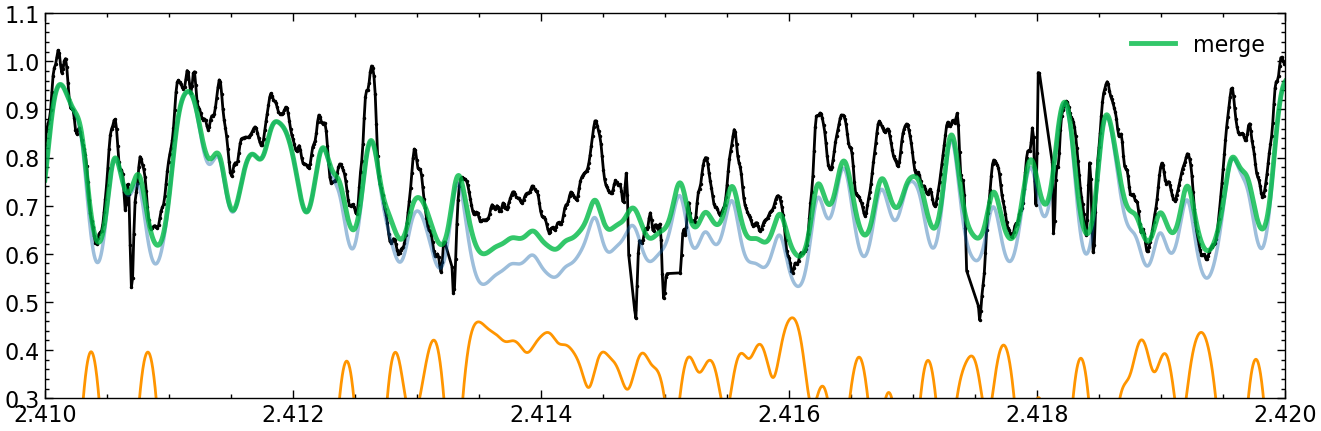

In [439]:
plt.figure(figsize = (16,5))
plt.plot(wavecorr, fluxcorr, 'k.-')
plt.plot(wavelength*1e-4, syntflux_all, lw = 2.5, alpha = 0.4)
# plt.plot(wavelength*1e-4, CO_emission)
plt.plot(wavelength*1e-4, CO_merge, label = "merge", lw = 3.5, alpha = 0.8)
plt.plot(wavelength*1e-4, CO_emission_shifted)
plt.ylim(0.3, 1.1)
plt.xlim(2.41, 2.42)
plt.legend()

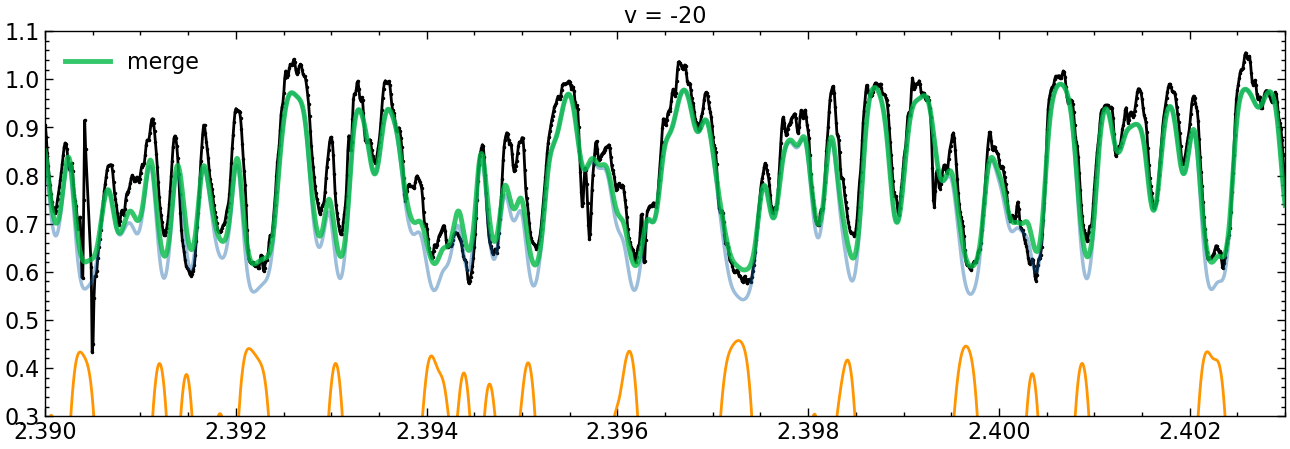

In [440]:
plt.figure(figsize = (16,5))
plt.plot(wavecorr, fluxcorr, 'k.-')
plt.plot(wavelength*1e-4, syntflux_all, lw = 2.5, alpha = 0.4)
# plt.plot(wavelength*1e-4, CO_emission)
plt.plot(wavelength*1e-4, CO_merge, label = "merge", lw = 3.5, alpha = 0.8)
plt.plot(wavelength*1e-4, CO_emission_shifted)
plt.ylim(0.3, 1.1)
plt.xlim(2.39, 2.403)
plt.title(f"v = {shift}")
plt.legend()

/tmp/ipykernel_1508015/3406950484.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


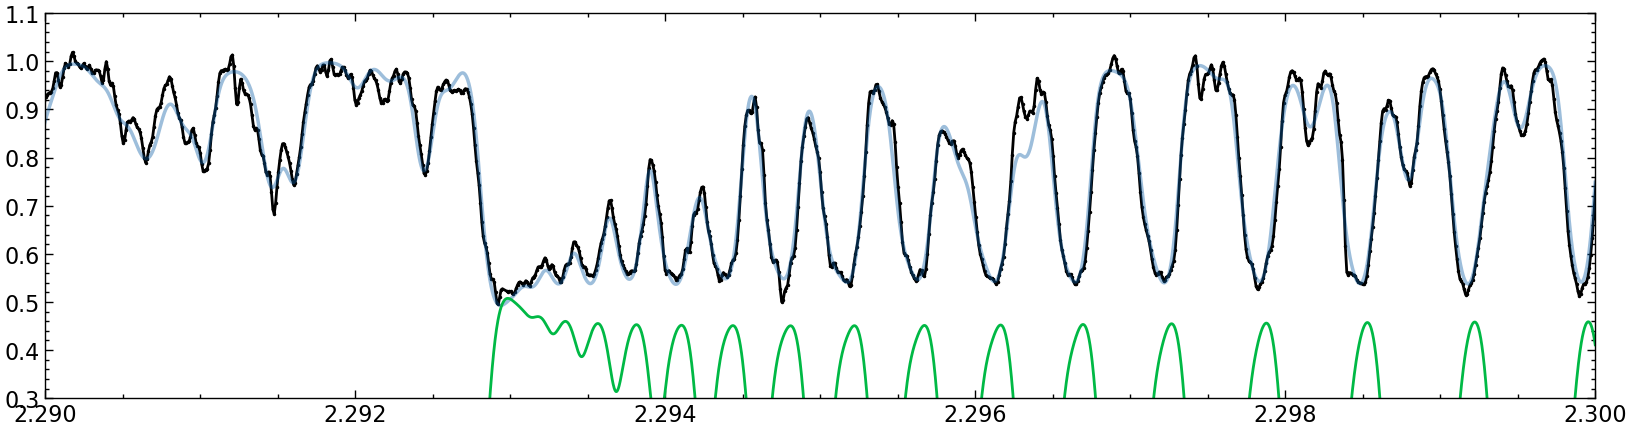

In [359]:
plt.figure(figsize = (20,5))
plt.plot(wavecorr, fluxcorr, 'k.-')
plt.plot(wavelength*1e-4, syntflux_all, lw = 2.5, alpha = 0.4)
# plt.plot(wavelength*1e-4, CO_emission)
# plt.plot(wavelength*1e-4, CO_merge, label = "merge", lw = 3.5, alpha = 0.8)
plt.plot(wavelength*1e-4, CO_emission_shifted)
plt.ylim(0.3, 1.1)
plt.xlim(2.29, 2.30)
plt.legend()